In [1]:
## Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Reading csv and excel files into dataframes
tm145 = pd.read_csv('../data/race_data/TelemetryData_14577742557187250604.csv', low_memory=False)
sd145 = pd.read_csv('../data/race_data/SessionData_14577742557187250604.csv', low_memory=False)
sd102 = pd.read_csv('../data/race_data/SessionData_10230136787177318441.csv', low_memory=False)
sd108 = pd.read_csv('../data/race_data/SessionData_1087987310493855854.csv', low_memory=False)
sd117 = pd.read_csv('../data/race_data/SessionData_11752605864096667831.csv', low_memory=False)
pilot1_102 = pd.read_excel('../data/excel_files/driver_1_tm102.xlsx')
pilot1_108 = pd.read_excel('../data/excel_files/driver_1_tm108.xlsx')
pilot1_117 = pd.read_excel('../data/excel_files/driver_1_tm117.xlsx')

##### I pushed all .csv files from the dataset onto a postgres database for manipulation using src/csv_to_db.py
##### Datasets filtered by pilot were created using sql_queries/* and src/convert_sqls.py

In [3]:
tm145.columns

Index(['sessionTime', 'frameIdentifier', 'pilot_index', 'worldPositionX',
       'worldPositionY', 'worldPositionZ', 'worldVelocityX', 'worldVelocityY',
       'worldVelocityZ', 'worldForwardDirX', 'worldForwardDirY',
       'worldForwardDirZ', 'worldRightDirX', 'worldRightDirY',
       'worldRightDirZ', 'gForceLateral', 'gForceLongitudinal',
       'gForceVertical', 'yaw', 'pitch', 'roll', 'speed', 'throttle', 'steer',
       'brake', 'clutch', 'gear', 'engineRPM', 'drs', 'brakesTemperature',
       'tyresSurfaceTemperature', 'tyresInnerTemperature', 'engineTemperature',
       'tyresPressure', 'surfaceType', 'fuelMix', 'pitLimiterStatus',
       'fuelInTank', 'fuelRemainingLaps', 'tyresWear', 'actualTyreCompound',
       'tyresDamage', 'ersStoreEnergy', 'ersDeployMode',
       'ersHarvestedThisLapMGUK', 'ersHarvestedThisLapMGUH',
       'ersDeployedThisLap', 'carPosition', 'currentLapTime', 'currentLapNum',
       'lapDistance', 'totalDistance', 'pitStatus', 'sector', 'driverStatus',

In [4]:
## Grabbing columns that I want in .corr()

tm145_1 = tm145[['worldVelocityX', 'worldVelocityY',
       'worldVelocityZ', 'gForceLateral', 'gForceLongitudinal',
       'gForceVertical', 'yaw', 'pitch', 'roll', 'speed', 'throttle', 'steer',
       'brake', 'clutch', 'gear', 'engineRPM', 'brakesTemperature',
       'tyresSurfaceTemperature', 'tyresInnerTemperature', 'engineTemperature',
       'tyresPressure', 'surfaceType', 'fuelInTank', 'fuelRemainingLaps', 'tyresWear',
       'carPosition', 'currentLapNum', 'totalDistance']]#corr(numeric_only=True)

tm145_1.corr(numeric_only=True)

,worldVelocityX,worldVelocityY,worldVelocityZ,gForceLateral,gForceLongitudinal,gForceVertical,yaw,pitch,roll,speed,...,brake,clutch,gear,engineRPM,engineTemperature,fuelInTank,fuelRemainingLaps,carPosition,currentLapNum,totalDistance
worldVelocityX,1.000000,-0.172524,0.382080,0.208356,-0.061706,0.040248,0.654535,-0.250945,0.084209,0.163673,...,-0.032524,0.000149,0.176504,-0.041677,-0.003377,-0.009915,-0.012182,0.002997,-0.006045,0.009420
worldVelocityY,-0.172524,1.000000,-0.375999,0.087968,-0.000096,-0.018910,0.121716,0.002066,-0.034604,-0.254580,...,0.055408,-0.000296,-0.258171,-0.121094,-0.001666,-0.010714,0.004859,0.019007,0.017472,0.011863
worldVelocityZ,0.382080,-0.375999,1.000000,0.042038,0.039829,0.022490,0.049088,0.083097,-0.028481,0.085053,...,-0.080137,0.000060,0.081020,-0.010368,0.001828,-0.005172,-0.008598,0.004743,-0.008506,0.004687
gForceLateral,0.208356,0.087968,0.042038,1.000000,0.009881,0.025131,0.095691,0.025854,0.569855,0.071320,...,0.026707,0.002944,0.059390,0.086348,-0.005347,-0.001976,-0.003575,0.009736,-0.002517,0.001775
gForceLongitudinal,-0.061706,-0.000096,0.039829,0.009881,1.000000,-0.029056,-0.050449,0.017643,-0.021853,0.006499,...,-0.910424,-0.000026,0.000863,0.071839,-0.000300,0.003244,0.002887,0.002152,-0.004343,-0.003189
gForceVertical,0.040248,-0.018910,0.022490,0.025131,-0.029056,1.000000,0.009251,-0.020763,-0.025104,0.007956,...,0.027201,0.000464,0.004264,-0.001265,0.001739,0.000555,0.000313,0.000541,-0.001230,-0.000548
yaw,0.654535,0.121716,0.049088,0.095691,-0.050449,0.009251,1.000000,-0.165077,0.055014,0.102842,...,-0.006227,0.002270,0.111397,-0.004814,-0.002919,0.002258,-0.003467,-0.011360,-0.009715,-0.002717
pitch,-0.250945,0.002066,0.083097,0.025854,0.017643,-0.020763,-0.165077,1.000000,0.170621,-0.192773,...,-0.022358,-0.002611,-0.203715,-0.091637,-0.001341,0.004144,0.003470,-0.004469,0.001530,-0.004082
roll,0.084209,-0.034604,-0.028481,0.569855,-0.021853,-0.025104,0.055014,0.170621,1.000000,-0.264273,...,0.011752,-0.001580,-0.264813,-0.192895,0.003923,-0.009982,-0.001031,0.005701,0.007835,0.010526
speed,0.163673,-0.254580,0.085053,0.071320,0.006499,0.007956,0.102842,-0.192773,-0.264273,1.000000,...,-0.014805,-0.035887,0.984664,0.639409,0.020340,-0.014333,-0.024868,-0.061554,0.006656,0.012993


<Axes: >

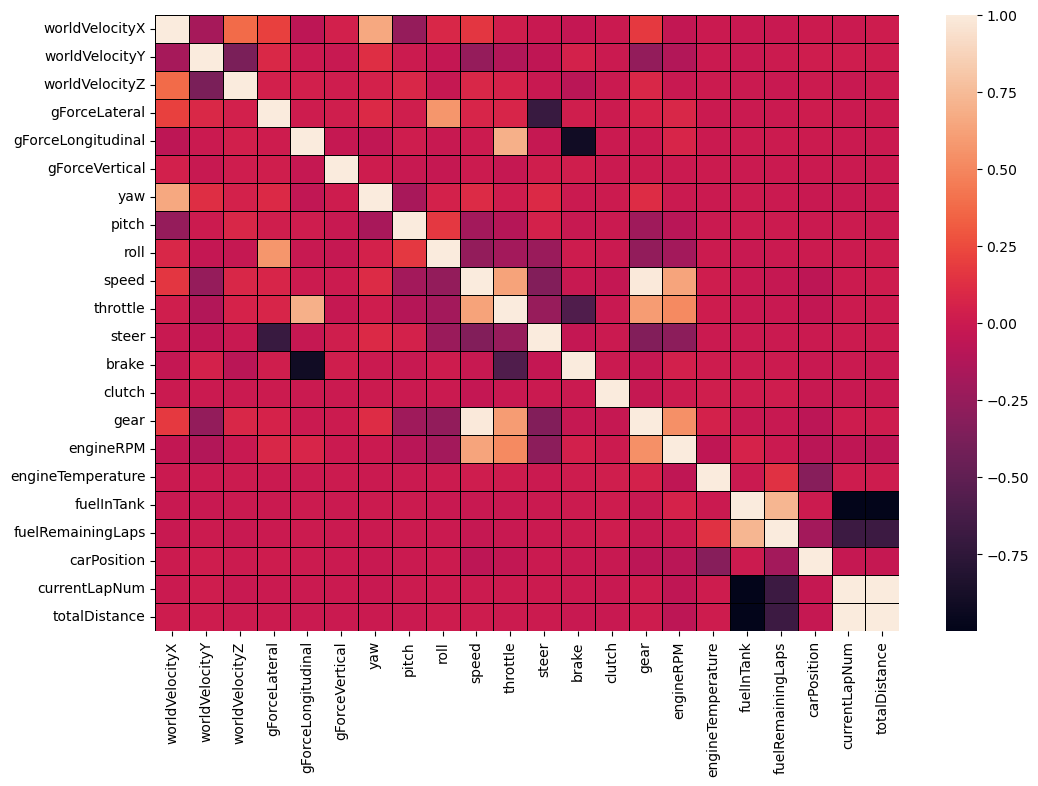

In [5]:
## Now for the heatmap
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(tm145_1.corr(numeric_only=True),linewidth=.5,linecolor='black')

In [6]:
# Strong negative corr between brake and gforcelong, steer and  gforcelat, currentLapNum and fuelinTank
# Strong positive corr between gear and speed

In [7]:
tm145

,sessionTime,frameIdentifier,pilot_index,worldPositionX,worldPositionY,worldPositionZ,worldVelocityX,worldVelocityY,worldVelocityZ,worldForwardDirX,...,ersDeployedThisLap,carPosition,currentLapTime,currentLapNum,lapDistance,totalDistance,pitStatus,sector,driverStatus,resultStatus
0,0.01045,0,0,338.27011,87.64803,982.12366,0.00148,0.00128,-0.00079,6810,...,0.000000e+00,18,0.00000,1,-153.76416,-153.76416,NaN,2,on track,active
1,0.01045,0,1,368.84494,87.64617,1097.98560,0.00164,0.00143,0.00049,6816,...,0.000000e+00,3,0.00000,1,-34.06787,-34.06787,NaN,2,on track,active
2,0.01045,0,2,365.50424,87.63545,1082.33362,-0.00027,-0.00252,0.00010,6810,...,0.000000e+00,5,0.00000,1,-50.07227,-50.07227,NaN,2,on track,active
3,0.01045,0,3,348.30042,87.63963,1029.06458,-0.00207,0.00295,-0.00003,6803,...,0.000000e+00,12,0.00000,1,-105.77002,-105.77002,NaN,2,on track,active
4,0.01045,0,4,358.24823,87.64635,1075.70874,0.00224,-0.00194,0.00072,6818,...,0.000000e+00,6,0.00000,1,-58.08643,-58.08643,NaN,2,on track,active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046815,2757.86548,58271,15,-42.72875,88.79483,875.45013,-7.24263,0.75570,-36.37080,-6498,...,1.301697e+06,11,23.06129,35,1230.39062,149859.57812,NaN,1,on track,active
1046816,2757.86548,58271,16,427.77100,87.67443,1438.59851,1.12654,0.03713,18.98629,3059,...,5.391362e+04,12,6.80934,35,343.15625,148972.34375,NaN,0,on track,active
1046817,2757.86548,58271,17,371.60034,87.63984,1319.71448,-7.61521,0.03265,54.83246,-4513,...,2.691799e+04,14,0.01011,35,189.57812,148818.76562,NaN,0,on track,finished
1046818,2757.86548,58271,18,-112.58393,89.90612,834.86865,-37.69330,0.11621,-8.62519,-31952,...,1.316058e+06,9,26.49298,35,1327.79688,149956.98438,NaN,1,on track,active


In [26]:
#Lets see how these corrs look with our single driver
pilot_filter = tm145.pilot_index == 10
tm_145_pilot1 = tm145[pilot_filter]
tm_145_pilot1

,sessionTime,frameIdentifier,pilot_index,worldPositionX,worldPositionY,worldPositionZ,worldVelocityX,worldVelocityY,worldVelocityZ,worldForwardDirX,...,ersDeployedThisLap,carPosition,currentLapTime,currentLapNum,lapDistance,totalDistance,pitStatus,sector,driverStatus,resultStatus
10,0.01045,0,10,372.18503,87.63564,1113.62769,0.00226,-0.00218,0.00072,6817,...,0.000,1,0.00000,1,-18.08496,-18.08496,NaN,2,on track,active
30,0.02127,1,10,372.18503,87.63564,1113.62769,0.00175,-0.00014,0.00057,6817,...,0.000,1,0.00000,1,-18.08496,-18.08496,NaN,2,on track,active
50,0.08427,2,10,372.18503,87.63564,1113.62769,0.00174,-0.00012,0.00054,6818,...,0.000,1,0.00000,1,-18.08496,-18.08496,NaN,2,on track,active
70,0.12629,3,10,372.18503,87.63564,1113.62769,0.00173,-0.00010,0.00055,6819,...,0.000,1,0.00000,1,-18.08496,-18.08496,NaN,2,on track,active
90,0.17861,4,10,372.18503,87.63564,1113.62769,0.00228,-0.00213,0.00072,6819,...,0.000,1,0.00000,1,-18.08496,-18.08496,NaN,2,on track,active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046730,2757.65698,58267,10,-183.96194,90.08389,410.08896,9.69604,-0.00020,-78.42360,4129,...,1936895.250,7,33.44726,35,1787.06250,150416.25000,NaN,1,on track,active
1046750,2757.70703,58268,10,-183.46979,90.08381,406.18628,10.08084,-0.00026,-78.46291,4287,...,1938459.500,7,33.49703,35,1790.98438,150420.17188,NaN,1,on track,active
1046770,2757.76587,58269,10,-182.86208,90.08372,401.55984,10.52701,-0.00021,-78.50688,4468,...,1940311.000,7,33.55608,35,1795.65625,150424.84375,NaN,1,on track,active
1046790,2757.81543,58270,10,-182.33257,90.08367,397.67838,10.88867,0.00003,-78.54243,4609,...,1941862.125,7,33.60538,35,1799.56250,150428.75000,NaN,1,on track,active


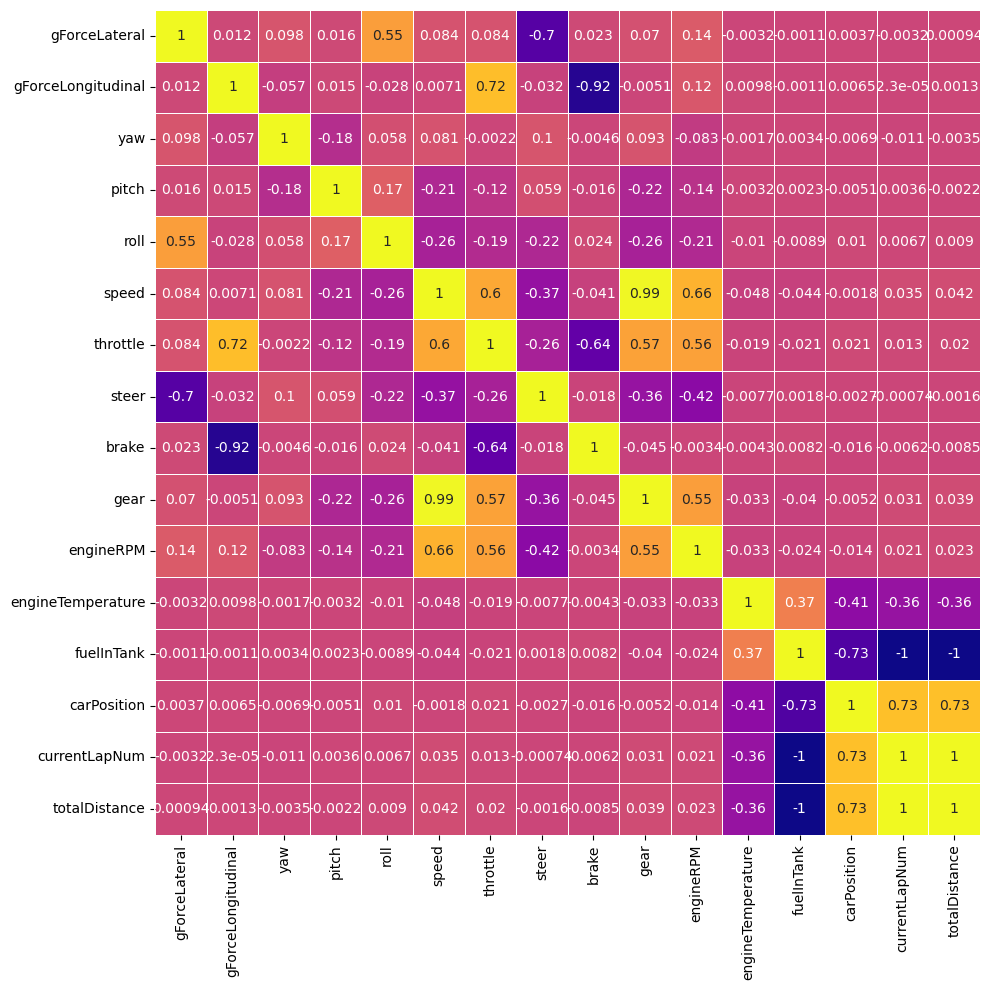

In [28]:
## I'm using the code below to cycle between pilots to compare heatmaps

'''fig, (ax1, ax2) = plt.subplots(1,2)
ax1 = sns.heatmap(tm_145_pilot1[['worldVelocityX', 'worldVelocityY',
       'worldVelocityZ', 'gForceLateral', 'gForceLongitudinal',
       'gForceVertical', 'yaw', 'pitch', 'roll', 'speed', 'throttle', 'steer',
       'brake', 'gear', 'engineRPM', 'brakesTemperature',
       'tyresSurfaceTemperature', 'tyresInnerTemperature', 'engineTemperature',
       'tyresPressure', 'surfaceType', 'fuelInTank', 'fuelRemainingLaps', 'tyresWear',
       'carPosition', 'currentLapNum', 'totalDistance']].corr(numeric_only=True),linewidth=.5,linecolor='black')
ax2 = sns.heatmap(tm145_1.corr(numeric_only=True),linewidth=.5,linecolor='black')'''

#mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.rcParams["figure.figsize"] = [10, 10]
plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({'font.size': 10})

fig, ax = plt.subplots()
fig.subplots_adjust(wspace=0.01)

sns.heatmap(tm_145_pilot1[['gForceLateral', 'gForceLongitudinal',
       'yaw', 'pitch', 'roll', 'speed', 'throttle', 'steer',
       'brake', 'gear', 'engineRPM', 'brakesTemperature',
       'tyresSurfaceTemperature', 'tyresInnerTemperature', 'engineTemperature',
       'tyresPressure', 'surfaceType', 'fuelInTank', 'tyresWear',
       'carPosition', 'currentLapNum', 'totalDistance']].corr(numeric_only=True), cmap="plasma", ax=ax, cbar=False, annot=True, linewidths=.5)
#sns.heatmap(tm145_1.corr(numeric_only=True), cmap="plasma", ax=ax2, cbar=False, linewidths=.5)


plt.show()

In [34]:
## Groupby pilot IDs using mean of numeric values to identify pilots that have outlying tm readings

pilot_avgs = tm145[['pilot_index','gForceLateral', 'gForceLongitudinal',
       'yaw', 'pitch', 'roll', 'speed', 'throttle', 'steer',
       'brake', 'gear', 'engineRPM', 'brakesTemperature',
       'tyresSurfaceTemperature', 'tyresInnerTemperature', 'engineTemperature',
       'tyresPressure', 'surfaceType', 'fuelInTank', 'tyresWear',
       'carPosition', 'currentLapNum', 'totalDistance']].groupby(['pilot_index']).mean(numeric_only=True)
pilot_avgs

,gForceLateral,gForceLongitudinal,yaw,pitch,roll,speed,throttle,steer,brake,gear,engineRPM,engineTemperature,fuelInTank,carPosition,currentLapNum,totalDistance
pilot_index,,,,,,,,,,,,,,,,
0,-0.267527,0.006264,-0.101856,0.001685,0.000729,199.467528,0.652229,0.049055,0.096435,4.850565,10477.571565,89.046411,28.433321,17.799201,17.375041,73629.497182
1,-0.283174,0.009003,-0.100488,0.001703,0.000718,202.627988,0.666719,0.051151,0.096081,4.954602,10484.934616,89.046411,28.337134,3.192144,17.830458,75604.817799
2,-0.280279,0.003310,-0.093769,0.001712,0.000769,202.756253,0.674167,0.050660,0.094688,4.965951,10482.108547,89.046411,28.607268,4.460557,17.805735,75495.144900
3,-0.274670,0.007666,-0.101991,0.001711,0.000720,200.971932,0.661864,0.050355,0.093574,4.897377,10492.838298,89.046411,29.168810,10.561797,17.595174,74596.275601
4,-0.278097,0.003201,-0.099311,0.001703,0.000726,202.514435,0.653437,0.049799,0.097592,4.937195,10501.018457,89.046411,28.356873,6.256090,17.698114,75047.029595
5,-0.277429,0.006347,-0.105968,0.001700,0.000704,202.565623,0.660886,0.049412,0.095976,4.945794,10491.753005,89.046411,27.965719,7.253644,17.674404,74947.726138
6,-0.226344,0.004036,-0.403313,0.001139,0.001534,160.387374,0.520228,0.039039,0.079908,3.925578,8356.197604,89.088179,30.674721,11.442922,16.935882,72094.103841
7,-0.274060,0.008946,-0.108184,0.001708,0.000736,201.930890,0.664854,0.048705,0.094416,4.929667,10493.327684,89.046411,30.262171,8.052406,17.658241,74874.401178
8,-0.269617,0.003470,-0.099836,0.001704,0.000674,199.810994,0.640769,0.049089,0.095965,4.858685,10484.250320,89.046411,28.949500,18.786019,17.363195,73585.698036
